In [15]:
import pandas as pd
import matplotlib.pyplot as plt

cpr = pd.read_csv('data/cpr.csv')

In [ ]:
cols_map = {
    # Political Freedom
    
    "polpart_*": "Right to participate in government",
    "assem_*": "Freedom of assembly and association",
    "express_*": "Right to opinion and expression",
    "union_*": "Right to form and join unions",
    "relig_*": "Freedom of religion and belief",

    # Civil Rights
    "tort_*": "Freedom from torture",
    "disap_*": "Freedom from disappearance",
    "exkill_*": "Freedom from extrajudicial execution",
    "arrest_*": "Freedom from arbitrary arrest or imprisonment",
    "dpex_*": "Freedom from death penalty"
}

In [13]:
# extract and rename relevant columns to civil rights

civil_rights_mean_columns = [
    'country',
    'year',
    "tort_mean",
    "disap_mean",
    "exkill_mean",
    "arrest_mean",
    "dpex_mean"
]

cr_map = {
    "tort_mean": "Freedom from torture",
    "disap_mean": "Freedom from disappearance",
    "exkill_mean": "Freedom from extrajudicial execution",
    "arrest_mean": "Freedom from arbitrary arrest or imprisonment",
    "dpex_mean": "Freedom from death penalty"
}

df = cpr.copy()
df = df[civil_rights_mean_columns]

df = df.rename(columns=cr_map)

df.head()

,country,year,Freedom from torture,Freedom from disappearance,Freedom from extrajudicial execution,Freedom from arbitrary arrest or imprisonment,Freedom from death penalty
0,Angola,2017,3.439210,6.464161,5.088942,3.789929,10.0
1,Angola,2018,4.458768,7.174069,5.283046,4.850208,10.0
2,Angola,2019,4.902350,6.357960,5.029688,4.970274,10.0
3,Angola,2020,4.754113,5.453531,3.844958,4.245430,10.0
4,Angola,2021,3.600660,4.963902,4.165898,3.885606,10.0


In [ ]:
# Take the mean values for each year to understand changes overtime
df_yearly_mean = df.groupby('year').mean(numeric_only=True)
df_yearly_mean.head()

,Freedom from torture,Freedom from disappearance,Freedom from extrajudicial execution,Freedom from arbitrary arrest or imprisonment,Freedom from death penalty
year,,,,,
2017,4.887877,6.819960,6.294702,5.258171,9.271419
2018,5.505195,7.320203,6.739419,5.687271,9.458731
2019,5.887445,7.631489,7.017165,5.946407,9.546117
2020,5.808151,7.426848,7.087485,6.211538,9.274424
2021,5.866108,7.267479,7.119212,6.169052,9.276985


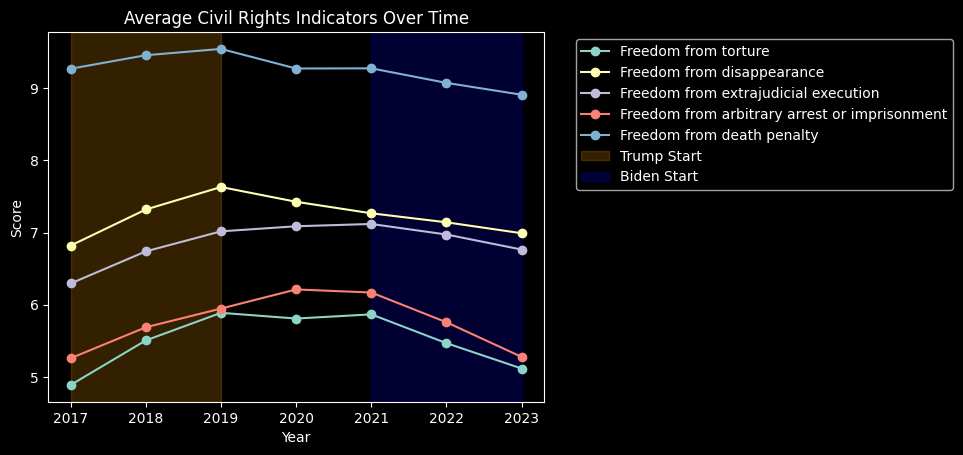

In [17]:
from collections import OrderedDict

ax = df_yearly_mean.plot(marker='o')
plt.title('Average Civil Rights Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Shade 2017-2018 (Trump start) and 2021-2022 (Biden start)
plt.axvspan(2017, 2019, color='orange', alpha=0.2, label='Trump Start')
plt.axvspan(2021, 2023, color='blue', alpha=0.2, label='Biden Start')

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Based on this plot, it seems as though the average civil rights over time is following a light cyclical pattern. All of the indicators increased at the start of the Trump presidency, remained relatively constant throughout the remainder of his term, and then decreased at the start of the Biden presidency. Unlike the Political Freedom analysis, however, the indicators remained very similar over time and did not see huge shifts throughout the period.

<h3>Analysis of Civil Rights Distribution</h3>

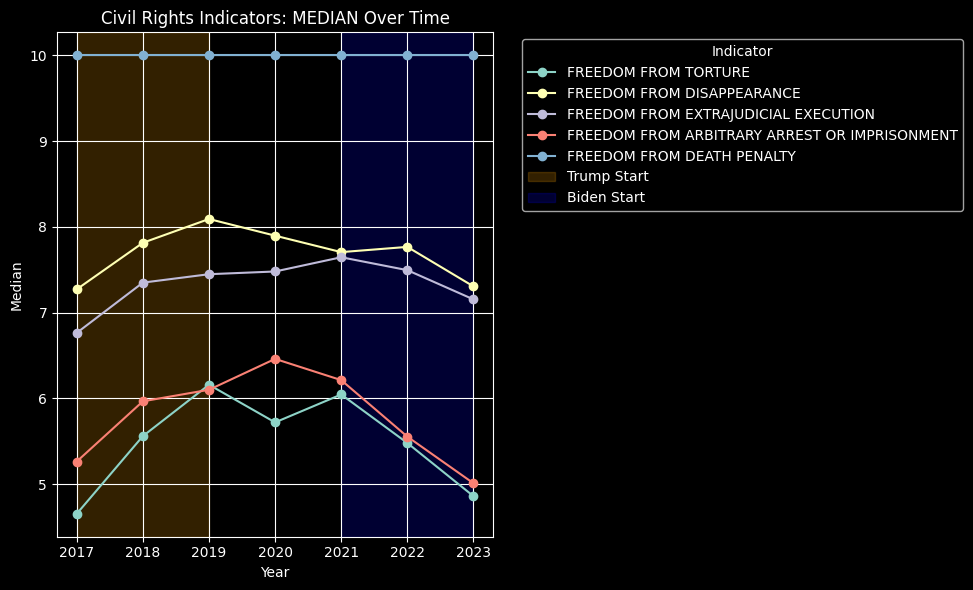

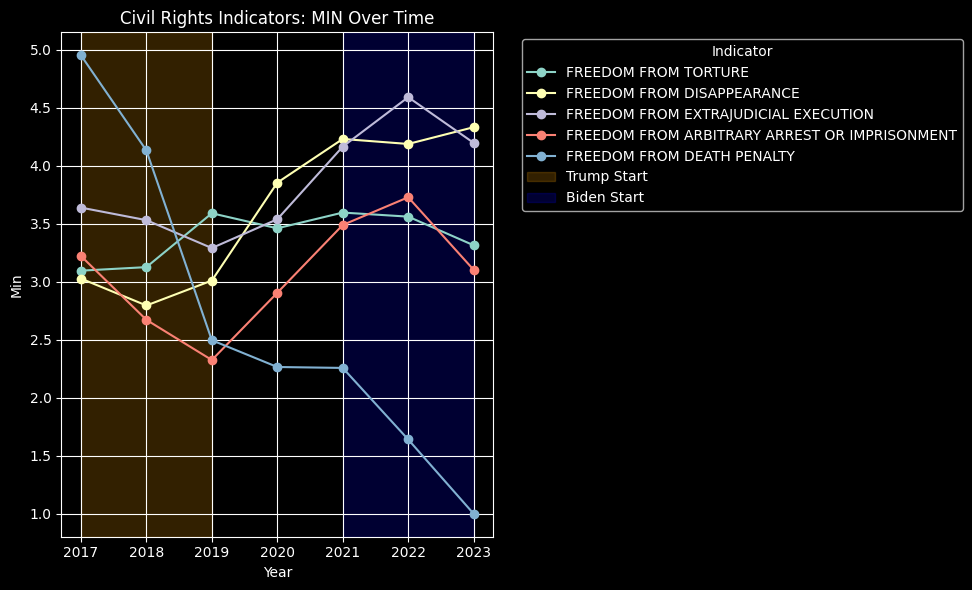

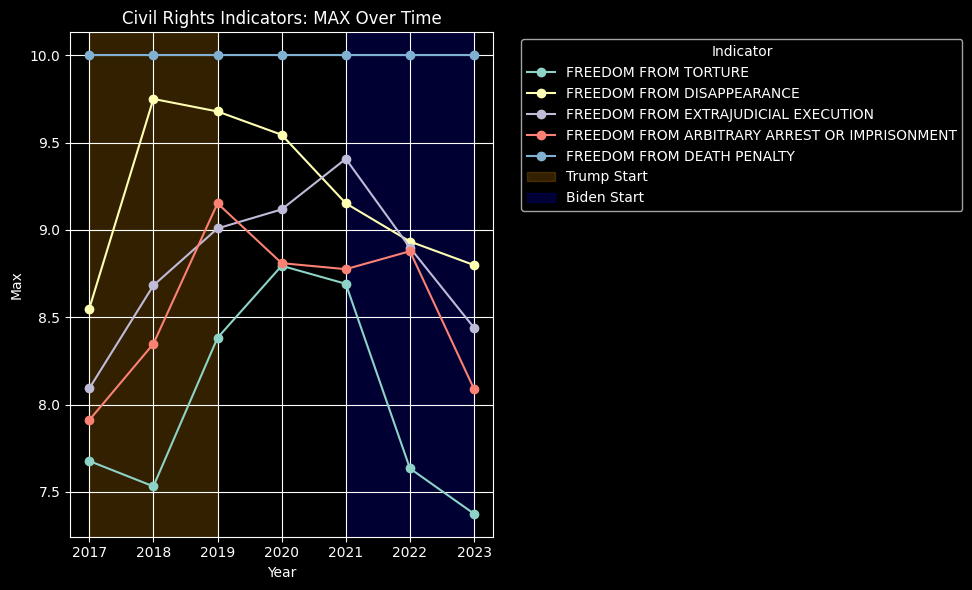

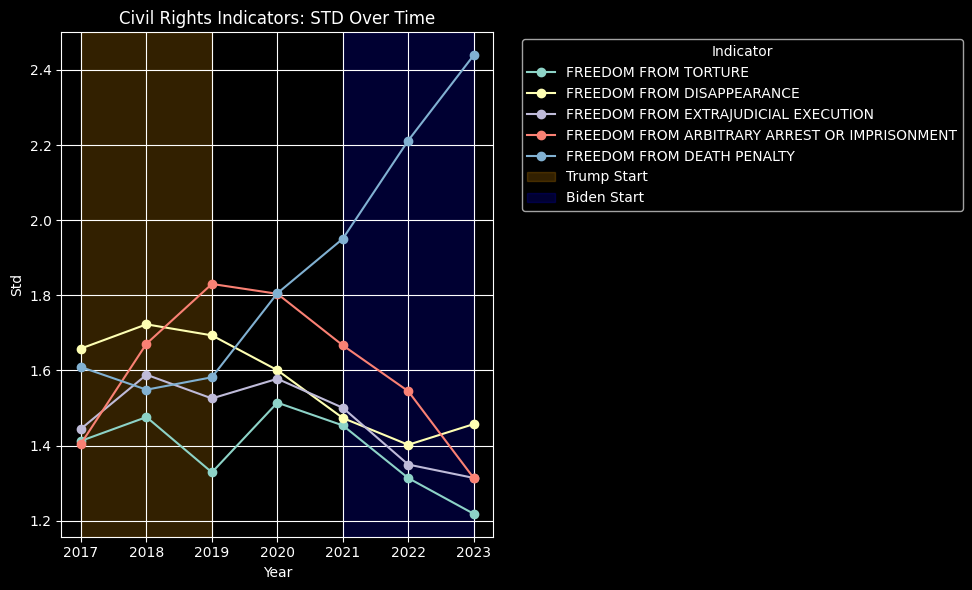

In [34]:
columns = df.columns[2:]
summary = df.groupby('year')[columns].agg(['median', 'std', 'min', 'max', lambda bottom_five: bottom_five.quantile(0.05), lambda top_95: top_95.quantile(0.95)])

metrics = ["median", "min", "max", "std"]

for metric in metrics:
    plt.figure(figsize=(10, 6))

    for indicator in columns:
        label_clean = indicator.replace("_mean", "").upper()
        ax = plt.gca()
        ax.plot(
            summary.index, 
            summary[(indicator, metric)], 
            marker='o', 
            label=label_clean
        )

    plt.title(f'Civil Rights Indicators: {metric.upper()} Over Time')
    plt.xlabel('Year')
    plt.ylabel(metric.capitalize())
    
    # Shade Trump (2017-2018) and Biden (2021-2022) start periods
    plt.axvspan(2017, 2019, color='orange', alpha=0.2, label='Trump Start')
    plt.axvspan(2021, 2023, color='blue', alpha=0.2, label='Biden Start')

    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(True)
    plt.tight_layout()
    plt.show()


Median: We notice that the trend for the median country is similar to the trend for the mean of the countries. However, the mean is greater than the median for all values, suggesting that a subset of the countries in the dataset are pulling the average values up. Furthermore, we notice that the median country experiences shifts more drastically than the global average would suggest. Ultimately, global civil rights protection worsened after 2020. 

Min: The worst countries' scores dipped sharply between 2017–2019 (early Trump years) and recovered a bit during 2021–2023 (Biden start).

Max: The best countries reached peak scores around 2019–2020. Then slight declines in maximum scores in recent years (2021–2023). This demonstrates that even the best countries experienced worsened civil-rights after 2020.

Standard Deviation: We notice that the standard deviation of indicators was relatively uncorrelated in 2017-2019. However, after 2020, the standard deviation of indicators began to decrease in a highly correlated fashion. This suggests that the civil-rights for the countries in the dataset began to converge in 2020, representing a foundational shift in human rights which brought the world closer together

<h3>Analysis for the United States</h3>

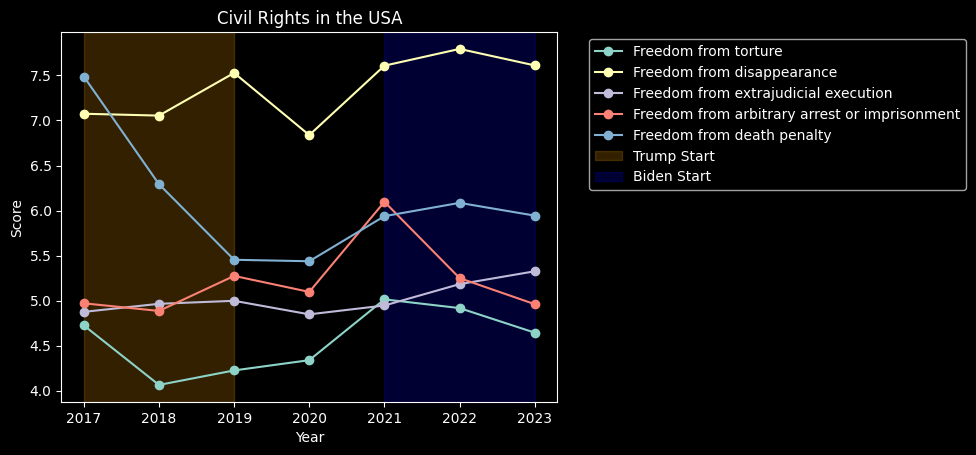

In [43]:
df_usa = df[df['country'] == 'United States']
cols = df_usa.columns[2:]

df_usa = df_usa.set_index('year') 
ax = df_usa[cols].plot(marker='o')
plt.title('Civil Rights in the USA')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

# Shade 2017-2018 (Trump start) and 2021-2022 (Biden start)
plt.axvspan(2017, 2019, color='orange', alpha=0.2, label='Trump Start')
plt.axvspan(2021, 2023, color='blue', alpha=0.2, label='Biden Start')

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()